In [1]:
# !pip install triangle

In [2]:
# !pip install Shapely

In [3]:
# !pip install freetype-py

In [4]:
# !pip install geopandas, geovoronoi

In [1]:
from freetype import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
height = 48

In [4]:
face = Face('../fonts/coolveticarg.ttf')
text = 'Hello World !'
face.set_char_size(height << 6, height << 6, 96, 96)
slot = face.glyph

In [53]:
face.load_char("P")

In [54]:
# # First pass to compute bbox
# width, height, baseline = 0, 0, 0
# previous = 0
# for i,c in enumerate(text):
#     face.load_char(c)
#     bitmap = slot.bitmap
#     height = max(height,
#                  bitmap.rows + max(0,-(slot.bitmap_top-bitmap.rows)))
#     baseline = max(baseline, max(0,-(slot.bitmap_top-bitmap.rows)))
#     kerning = face.get_kerning(previous, c)
#     width += (slot.advance.x >> 6) + (kerning.x >> 6)
#     previous = c

# Z = numpy.zeros((height,width), dtype=numpy.ubyte)

# # Second pass for actual rendering
# x, y = 0, 0
# previous = 0
# for c in text:
#     face.load_char(c)
#     bitmap = slot.bitmap
#     top = slot.bitmap_top
#     left = slot.bitmap_left
#     w,h = bitmap.width, bitmap.rows
#     y = height-baseline-top
#     kerning = face.get_kerning(previous, c)
#     x += (kerning.x >> 6)
#     Z[y:y+h,x:x+w] += numpy.array(bitmap.buffer, dtype='ubyte').reshape(h,w)
#     x += (slot.advance.x >> 6)
#     previous = c

# plt.figure(figsize=(10, 10*Z.shape[0]/float(Z.shape[1])))
# plt.imshow(Z, interpolation='nearest', origin='upper', cmap=plt.cm.gray)
# plt.xticks([]), plt.yticks([])
# plt.show()


In [55]:
from font_struct import *

In [56]:
v = Vectoriser(slot.outline, bezierSteps=3, reverse=False)

In [57]:
v.contourList[0].pointList

[array([1204, 1408]),
 array([1352.72222222, 1422.11111111]),
 array([1470.88888889, 1464.44444444]),
 array([1558.5, 1535. ]),
 array([1618.77777778, 1628.22222222]),
 array([1654.94444444, 1738.55555556]),
 array([1667, 1866]),
 array([1654.94444444, 1987.66666667]),
 array([1618.77777778, 2094.        ]),
 array([1558.5, 2185. ]),
 array([1470.88888889, 2254.44444444]),
 array([1352.72222222, 2296.11111111]),
 array([1204, 2310]),
 array([ 664, 2310]),
 array([ 664, 1408])]

In [58]:
inner_ps = np.array(v.contourList[1].pointList)

In [59]:
for contour in v.contourList:
    print(contour.clockwise)

False
True


In [60]:
from font_util import triangulate_contour

In [61]:
outer_contour_points = v.contourList[1].pointList
inner_contour_points_list = [v.contourList[0].pointList]

In [62]:
B = triangulate_contour(outer_contour_points, inner_contour_points_list)

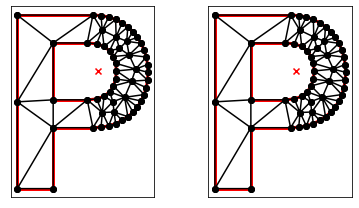

In [63]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr

tr.compare(plt, B, B)
plt.show()

In [66]:
B["vertices"]

array([[  94.        ,    0.        ],
       [  94.        , 2752.        ],
       [1294.        , 2752.        ],
       [1423.44444444, 2744.27777778],
       [1543.77777778, 2721.11111111],
       [1655.        , 2682.5       ],
       [1756.61111111, 2630.05555556],
       [1848.11111111, 2565.38888889],
       [1929.5       , 2488.5       ],
       [1999.94444444, 2401.        ],
       [2058.61111111, 2304.5       ],
       [2105.5       , 2199.        ],
       [2139.66666667, 2086.22222222],
       [2160.16666667, 1967.88888889],
       [2167.        , 1844.        ],
       [2160.16666667, 1720.38888889],
       [2139.66666667, 1602.88888889],
       [2105.5       , 1491.5       ],
       [2058.61111111, 1388.33333333],
       [1999.94444444, 1295.5       ],
       [1929.5       , 1213.        ],
       [1848.11111111, 1141.27777778],
       [1756.61111111, 1080.77777778],
       [1655.        , 1031.5       ],
       [1543.77777778,  995.11111111],
       [1423.44444444,  9

In [68]:
B["triangles"]

array([[ 0, 28, 27],
       [27, 29, 43],
       [26, 29, 27],
       [12, 52, 13],
       [43, 55, 27],
       [25, 24, 44],
       [27, 55,  0],
       [26, 25, 44],
       [18, 45, 19],
       [47, 40, 39],
       [44, 30, 29],
       [ 7,  6, 46],
       [30, 44, 31],
       [50, 53, 44],
       [10, 49, 11],
       [32, 45, 33],
       [44, 29, 26],
       [15, 14, 52],
       [44, 53, 31],
       [ 4,  3, 47],
       [21, 50, 22],
       [42,  2,  1],
       [ 2, 42, 41],
       [41, 40, 47],
       [46, 54, 51],
       [ 2, 41, 47],
       [ 1, 55, 42],
       [51, 54, 49],
       [24, 23, 50],
       [16, 15, 48],
       [39, 38, 46],
       [47,  3,  2],
       [39, 46, 47],
       [ 5, 47, 46],
       [54, 38, 37],
       [54, 46, 38],
       [50, 45, 53],
       [42, 55, 43],
       [23, 22, 50],
       [49, 54, 37],
       [50, 21, 45],
       [53, 32, 31],
       [19, 45, 20],
       [21, 20, 45],
       [45, 32, 53],
       [17, 45, 18],
       [52, 49, 36],
       [44, 2

In [24]:
from shapely.geometry import Polygon
from shapely.ops import triangulate

In [25]:
polygon = Polygon(outer_contour_points, [])

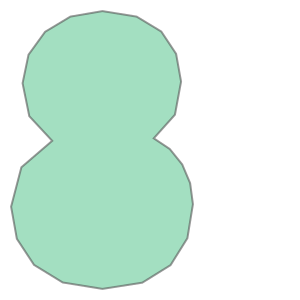

In [26]:
polygon

In [70]:
delauney=triangulate(polygon)

In [25]:
def triangulate_within(polygon):
    return [triangle for triangle in triangulate(polygon) if triangle.covered_by(polygon) or triangle.within(polygon) or True]

In [26]:
delauney = triangulate_within(polygon)

In [27]:
len(delauney)

124

In [28]:
triangular_vertices = list(delauney[0].exterior.coords)

In [29]:
triangular_vertices

[(127.0, 3200.0), (94.0, 1831.0), (758.0, 2777.0), (127.0, 3200.0)]

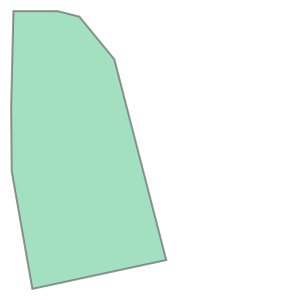

In [30]:
from shapely.ops import unary_union
 
unary_union(delauney)

/home/yizhou/miniconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  if sys.path[0] == "":
/home/yizhou/miniconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.


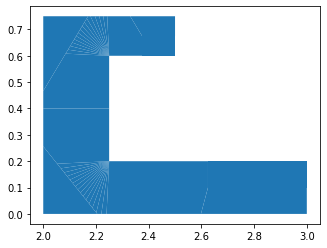

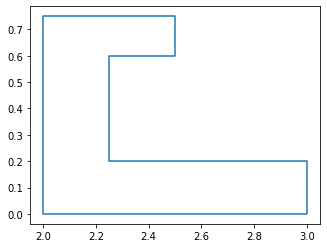

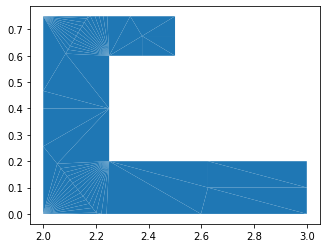

In [31]:
import numpy as np
from shapely.geometry import Polygon
from shapely.ops import triangulate
import shapely.wkt
import geopandas as gpd
from geovoronoi import voronoi_regions_from_coords

def to_triangles(polygon):

    poly_points = []

    gdf_poly_exterior = gpd.GeoDataFrame({'geometry': [polygon.buffer(-0.0000001).exterior]}).explode().reset_index()
    for geom in gdf_poly_exterior.geometry:
        poly_points += np.array(geom.coords).tolist()

    try:
        polygon.interiors[0]
    except:
        poly_points = poly_points
    else:
        gdf_poly_interior = gpd.GeoDataFrame({'geometry': [polygon.interiors]}).explode().reset_index()
        for geom in gdf_poly_interior.geometry:
            poly_points += np.array(geom.coords).tolist()

    poly_points = np.array([item for sublist in poly_points for item in sublist]).reshape(-1,2)

    poly_shapes, pts = voronoi_regions_from_coords(poly_points, polygon)
    gdf_poly_voronoi = gpd.GeoDataFrame({'geometry': poly_shapes}).explode().reset_index()
    gdf_poly_voronoi.plot()

    tri_geom = []
    for geom in gdf_poly_voronoi.geometry:
        inside_triangles = [tri for tri in triangulate(geom) if tri.centroid.within(polygon)]
        tri_geom += inside_triangles

    gdf_poly_triangles = gpd.GeoDataFrame({'geometry': tri_geom})

    gdf_poly_exterior.plot()
    if 'gdf_poly_interior' in locals():
        gdf_poly_interior.plot()
    gdf_poly_triangles.plot()

polygon_1 = Polygon([(0, 0), (0, 3), (5, 3), (2, 4), (6, 4), (6, 0)])
polygon_2 = Polygon([(3.0, 0.0), (2.0, 0.0), (2.0, 0.75), (2.5, 0.75), (2.5, 0.6), (2.25, 0.6), (2.25, 0.2), (3.0, 0.2), (3.0, 0.0)])
poly_3_wkt = 'POLYGON ((-74.05644319847762 4.664371152795165, -74.05701264773319 4.663503533579181, -74.05770573357918 4.662810447733186, -74.05896428283818 4.662056102337443, -74.05990224838993 4.661771573597983, -74.06224145161008 4.661772473597984, -74.06317941716183 4.662057002337444, -74.06443796642083 4.662811347733187, -74.06572065226682 4.664052233579182, -74.06921901369725 4.668360960588712, -74.07141674761461 4.670691972117472, -74.07635895116509 4.673818151938486, -74.07894493390593 4.675834266094067, -74.08192435226682 4.679424333579181, -74.08891615226682 4.688383433579182, -74.08958587724112 4.689463067989243, -74.09086467349047 4.690719228823506, -74.09790275116509 4.694460551938487, -74.10034036642082 4.696114147733187, -74.10386724657296 4.698958762835078, -74.10814346936803 4.700870863662334, -74.10930545161006 4.700957773597984, -74.11043741716183 4.701320402337444, -74.11139045116509 4.701828051938487, -74.11214813390593 4.702449866094067, -74.11445885226682 4.704984433579183, -74.11521319766256 4.706242982838176, -74.11590442640203 4.70845234838992, -74.11611382363337 4.710865185701647, -74.11554750632175 4.71273208368413, -74.11467343390593 4.713910633905932, -74.11305131716183 4.714994497662556, -74.11211335161008 4.715279026402015, -74.11073328554708 4.715355222566556, -74.11041129766257 4.716545717161825, -74.1094660522668 4.718057466420818, -74.10756213390592 4.720161033905933, -74.10568445116508 4.721873348061513, -74.10420772338625 4.722584201678661, -74.10275629999998 4.7227995, -74.10130487661371 4.722584201678661, -74.09995094883489 4.721945648061514, -74.09403374773316 4.716245366420819, -74.09338219367824 4.71525808368413, -74.09288787359796 4.71387655161008, -74.09288787359796 4.711925648389919, -74.0936469519385 4.710096948834901, -74.09548963357916 4.708043347733187, -74.09763068874044 4.70677727898599, -74.09460666784895 4.704312469919607, -74.09203589291714 4.702595752799392, -74.08765371631586 4.700417706321742, -74.08459603357916 4.698508252266813, -74.08273894773316 4.696641066420818, -74.08206922275886 4.695561432010757, -74.08118604773318 4.694727366420818, -74.0717936025263 4.682825210334004, -74.06562484883489 4.678834648061513, -74.06390001213198 4.677314420684328, -74.0535710885149 4.739037649974117, -74.05520778283815 4.737937702337444, -74.05712119999998 4.7375571, -74.06045152338628 4.738003698321339, -74.06217206642083 4.738923347733187, -74.06340970632175 4.74043141631587, -74.06393542640203 4.74187004838992, -74.06400742363337 4.743335585701648, -74.063537026402 4.74698295161008, -74.06279044806149 4.748785351165098, -74.06139073691359 4.75018144712255, -74.0609743487264 4.751890490745711, -74.06128649999999 4.753612599999999, -74.06107120167866 4.755064023386272, -74.06039964806149 4.756487551165098, -74.0594142664208 4.757574752266813, -74.05806621716184 4.758372197662556, -74.05615280000001 4.7587528, -74.05377854838993 4.758482026402016, -74.0507277649826 4.757844764394359, -74.05055722640202 4.75945045161008, -74.04983964400328 4.762451751932777, -74.04873032640204 4.76925805161008, -74.04829449766255 4.770818617161826, -74.04766074258318 4.772140089033794, -74.04726809766255 4.773711517161825, -74.04651375226682 4.774970066420818, -74.04542655116509 4.775955448061513, -74.04410012338627 4.776582801678661, -74.04215861429836 4.776774023633361, -74.04029171631588 4.776207706321742, -74.03878364773318 4.774970066420818, -74.03800540233745 4.773666917161825, -74.03729177636662 4.771281485701648, -74.03727967636664 4.770004014298352, -74.03747549832134 4.769002476613728, -74.03843161386389 4.767199327773277, -74.04047532279198 4.75512284897233, -74.0369408023945 4.754256982815782, -74.03025007661371 4.753148101678661, -74.02876484883491 4.752415548061514, -74.02767764773319 4.751430166420819, -74.02692330233745 4.750171617161826, -74.02654087636664 4.748620285701648, -74.02683367636664 4.736912214298353, -74.02739999367826 4.73504531631587, -74.02863763357918 4.733537247733187, -74.03035817661373 4.732617598321339, -74.03229968570164 4.732426376366639, -74.03372301716183 4.732782902337444, -74.03534513390593 4.733866766094067, -74.03621920632175 4.73504531631587, -74.03676491551958 4.736773285680133, -74.04355019487681 4.738452884397855, -74.04767016881966 4.714185707761746, -74.04885077359798 4.706409648389919, -74.05027314410287 4.698677293675041, -74.05045487359796 4.696561148389919, -74.05077748485968 4.695365046361829, -74.05289107166563 4.682999393176747, -74.05422957359798 4.67404324838992, -74.05473458359565 4.671889824337649, -74.05543207359798 4.667273848389919, -74.05644319847762 4.664371152795165))'
polygon_3 = shapely.wkt.loads(poly_3_wkt)
poly_4_wkt = 'Polygon ((22.11315279161000547 -25.09231820047121886, 21.62718174901616663 -26.2204652636354929, 22.01769419395764515 -27.5308514677724574, 23.33675845242663982 -28.13831527101475416, 24.77731547154409597 -27.47010508744822488, 24.86409601486442256 -26.98413404485438605, 23.92686614700487624 -26.97545599052235232, 24.55168605891124045 -26.38534829594411946, 25.86207226304820495 -26.14236277464719649, 26.1918383276654545 -26.70643630622933529, 25.92281864337243391 -27.30522205513960188, 26.69516547892335723 -26.88867544720202218, 26.75591185924758975 -26.19443110063939528, 25.93149669770446764 -25.73449422104165407, 25.51495008976689149 -25.98615779667060366, 25.14179375348947687 -25.69978200371352273, 24.68185687389173566 -25.25720123277984541, 23.85744171234861355 -26.09029444865500125, 23.71859284303608462 -26.81925101254575949, 22.81607519250466964 -26.2204652636354929, 23.26733401777037713 -25.343981776100172, 23.17187542011801682 -24.90140100516649824, 22.77268492084450457 -24.55427883188518123, 22.11315279161000547 -25.09231820047121886),(22.46027496489132247 -25.79524060136588304, 22.01769419395764515 -26.19443110063939528, 22.2172894435943995 -26.38534829594411946, 22.45159691055928874 -26.48948494792850994, 22.55573356254368278 -26.53287521958867501, 22.49498718221945381 -26.75850463222153053, 22.92021184448906368 -26.68908019756526784, 22.33010414991082726 -26.32460191561988694, 22.5817677255397804 -26.02087001399873856, 22.93756795315312758 -25.3786939934283069, 22.81607519250466964 -25.343981776100172, 22.46027496489132247 -25.79524060136588304),(23.10245098546175413 -27.53952952210448757, 22.54705550821164906 -27.47010508744822488, 22.81607519250466964 -27.05355847951064874, 23.64049035404779175 -27.17505124015910667, 23.692558680039987 -27.59159784809668636, 23.18055347445005054 -27.85193947805767323, 23.10245098546175413 -27.53952952210448757),(24.24795415729009207 -26.20310915497142901, 24.36076886360651983 -25.94276752501044214, 24.70789103688783328 -25.95144557934247587, 24.81202768887222732 -25.95144557934247587, 24.77731547154409597 -25.78656254703384931, 25.0810473731652479 -25.91673336201434097, 25.07236931883321418 -26.10765055731906514, 24.65582271089563449 -26.15104082897923021, 24.34341275494245238 -26.38534829594411946, 24.24795415729009207 -26.20310915497142901))'
polygon_4 = shapely.wkt.loads(poly_4_wkt)

to_triangles(polygon_2)

/home/yizhou/miniconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  if sys.path[0] == "":
/home/yizhou/miniconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.


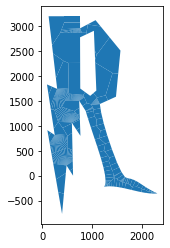

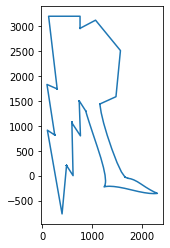

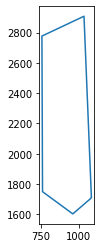

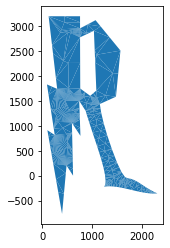

In [17]:
to_triangles(polygon)

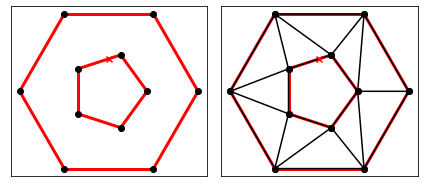

In [57]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr


def circle(N, R):
    i = np.arange(N)
    theta = i * 2 * np.pi / N
    pts = np.stack([np.cos(theta), np.sin(theta)], axis=1) * R
    seg = np.stack([i, i + 1], axis=1) % N
    return pts, seg


pts0, seg0 = circle(6, 1.4)
pts1, seg1 = circle(5, 0.6)
pts = np.vstack([pts0, pts1])
seg = np.vstack([seg0, seg1 + seg0.shape[0]])

A = dict(vertices=pts, segments=seg, holes=[[0,0.5]])
B = tr.triangulate(A, 'qpa')
tr.compare(plt, A, B)
plt.show()

In [96]:
[1] + []

[1]

In [94]:
np.mean(pts, axis = 0)

array([-2.01858732e-17,  5.04646829e-17])

In [92]:
seg0

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 0]])

In [91]:
np.vstack([seg0, []])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 0

In [89]:
A

{'vertices': array([[ 1.40000000e+00,  0.00000000e+00],
        [ 7.00000000e-01,  1.21243557e+00],
        [-7.00000000e-01,  1.21243557e+00],
        [-1.40000000e+00,  1.71450552e-16],
        [-7.00000000e-01, -1.21243557e+00],
        [ 7.00000000e-01, -1.21243557e+00],
        [ 6.00000000e-01,  0.00000000e+00],
        [ 1.85410197e-01,  5.70633910e-01],
        [-4.85410197e-01,  3.52671151e-01],
        [-4.85410197e-01, -3.52671151e-01],
        [ 1.85410197e-01, -5.70633910e-01]]),
 'segments': array([[ 0,  1],
        [ 1,  2],
        [ 2,  3],
        [ 3,  4],
        [ 4,  5],
        [ 5,  0],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10],
        [10,  6]]),
 'holes': [[0, 0.5]]}

In [88]:
B['vertices']

array([[ 1.40000000e+00,  0.00000000e+00],
       [ 7.00000000e-01,  1.21243557e+00],
       [-7.00000000e-01,  1.21243557e+00],
       [-1.40000000e+00,  1.71450552e-16],
       [-7.00000000e-01, -1.21243557e+00],
       [ 7.00000000e-01, -1.21243557e+00],
       [ 6.00000000e-01,  0.00000000e+00],
       [ 1.85410197e-01,  5.70633910e-01],
       [-4.85410197e-01,  3.52671151e-01],
       [-4.85410197e-01, -3.52671151e-01],
       [ 1.85410197e-01, -5.70633910e-01]])

In [54]:
pts1.tolist()

[[0.6, 0.0],
 [0.18541019662496847, 0.570633909777092],
 [-0.48541019662496837, 0.35267115137548394],
 [-0.48541019662496854, -0.3526711513754838],
 [0.18541019662496833, -0.5706339097770922]]

In [36]:
seg

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 25],
       [25, 26],
       [26, 27],
       [27, 28],
       [28, 29],
       [29,  0],
       [30, 31],
       [31, 32],
       [32, 33],
       [33, 34],
       [34, 35],
       [35, 36],
       [36, 37],
       [37, 38],
       [38, 39],
       [39, 40],
       [40, 41],
       [41, 42],
       [42, 43],
       [43, 44],
       [44, 45],
       [45, 30]])

# ------------

In [23]:
extrude = 16
bevelRadius = 2.4
bevelSegments = 4

In [24]:
mesh = Mesh()

In [25]:
for i in range(len(delauney)):
    triangular_vertices = list(delauney[i].exterior.coords)

    v1, v2, v3 = Vertex(), Vertex(), Vertex()

    v1.x = triangular_vertices[0][0]
    v1.y = triangular_vertices[0][1]
    v1.z = -bevelRadius

    v2.x = triangular_vertices[1][0]
    v2.y = triangular_vertices[1][1]
    v2.z = -bevelRadius

    v3.x = triangular_vertices[2][0]
    v3.y = triangular_vertices[2][1]
    v3.z = -bevelRadius
    
    mesh.addTriangle(v1, v2, v3)
    
    v1, v2, v3 = Vertex(), Vertex(), Vertex()
    
    v1.x = triangular_vertices[0][0]
    v1.y = triangular_vertices[0][1]
    v1.z = bevelRadius + extrude

    v2.x = triangular_vertices[1][0]
    v2.y = triangular_vertices[1][1]
    v2.z = bevelRadius + extrude

    v3.x = triangular_vertices[2][0]
    v3.y = triangular_vertices[2][1]
    v3.z = bevelRadius + extrude
    
    mesh.addTriangle(v3, v2, v1) # pay attention to the order

In [26]:
mesh.saveOBJ("test0.obj")